In [89]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

## Automobile Case Study
As seen in "04_eda", Nanaimo was the best performing city for 'car/truck/van' and 'motorcycle/scooter' transportation out of the 10 cities found to be 'similar' to Langley in terms of population trends between 2016 to 2021. Kamloops also performed very well for 'car/truck/van' transportation, and will be included in this analysis as another example of a city with better performance than Langley.

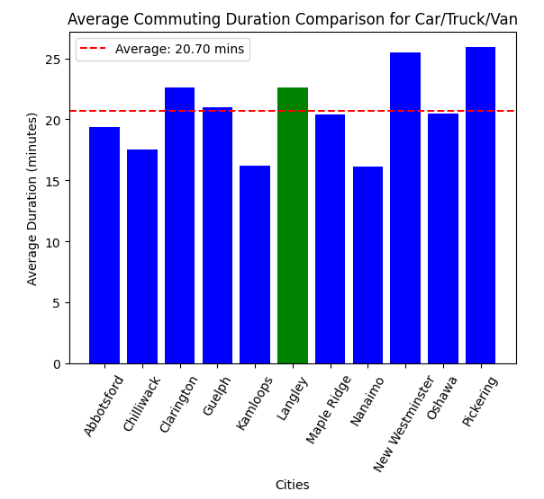

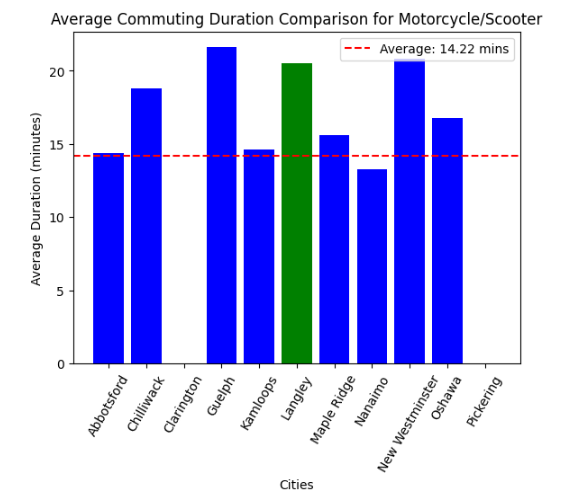

In this notebook, we will:

1. highlight the difference between Nanaimo + Kamloops and Langley's commuting times
2. dissect how Nanaimo and Kamloops have been able to lower their commuting times

Let's first compare Nanaimo, Kamloops, and Langley's commuting times like we did in "04_eda".

In [128]:
# Import the similar_cities dataset
similar_cities = pd.read_csv("../data/processed/similar_cities.csv")
nanaimo_data = similar_cities[similar_cities["Geography"] == "Nanaimo"]
langley_data = similar_cities[similar_cities["Geography"] == "Langley"]
kamloops_data = similar_cities[similar_cities["Geography"] == "Kamloops"]
langley_nanaimo_kamloops = pd.concat([langley_data, nanaimo_data, kamloops_data])
print(langley_nanaimo_kamloops)

  Geography  Car_Truck_Van_Less_Than_15  Car_Truck_Van_15_to_29  \
5   Langley                      6527.5                  9895.0   
7   Nanaimo                     16837.5                 12600.0   
4  Kamloops                     12660.0                 12275.0   

   Car_Truck_Van_30_to_44  Car_Truck_Van_45_to_59  Car_Truck_Van_More_Than_60  \
5                  5785.0                  1897.5                       745.0   
7                  3000.0                   920.0                       690.0   
4                  1890.0                   630.0                       535.0   

   Car_Truck_Van_Avg_Duration  Public_Transit_Less_Than_15  \
5                       22.60                        107.5   
7                       16.15                        202.5   
4                       16.20                        315.0   

   Public_Transit_15_to_29  Public_Transit_30_to_44  ...  Other_30_to_44  \
5                    297.5                    395.0  ...            22.5   
7    

According to the exploatory data analysis in "04_eda", Nanaimo and Kamloops had the best performing average commuting times for two transportation modes, "Car/Truck/Van" and "Motorcycle/Scooter/Mopeds". Let's take an in-depth look at the commuting times for both types of transportation modes.

In [129]:
# First, create a filter for the relevant columns we want to look at first (Car/Truck/Van data)
car_truck_van = []
for column in langley_nanaimo_kamloops.columns:
    if column.startswith("Car_Truck_Van_") and column != "Car_Truck_Van_Avg_Duration":
        car_truck_van.append(column)
print(car_truck_van)

['Car_Truck_Van_Less_Than_15', 'Car_Truck_Van_15_to_29', 'Car_Truck_Van_30_to_44', 'Car_Truck_Van_45_to_59', 'Car_Truck_Van_More_Than_60']


In [130]:
pretty_car_truck_van = [column.replace("Car_Truck_Van_", "").replace("_", " ") for column in car_truck_van]
print(pretty_car_truck_van)

['Less Than 15', '15 to 29', '30 to 44', '45 to 59', 'More Than 60']


In [131]:
# Extract commuting period data for Langley and Nanaimo
langley_values = langley_data[car_truck_van].to_numpy().flatten()
nanaimo_values = nanaimo_data[car_truck_van].to_numpy().flatten()
kamloops_values = kamloops_data[car_truck_van].to_numpy().flatten()

# Verify these values
print(langley_values)
print(nanaimo_values)
print(kamloops_values)

[6527.5 9895.  5785.  1897.5  745. ]
[16837.5 12600.   3000.    920.    690. ]
[12660. 12275.  1890.   630.   535.]


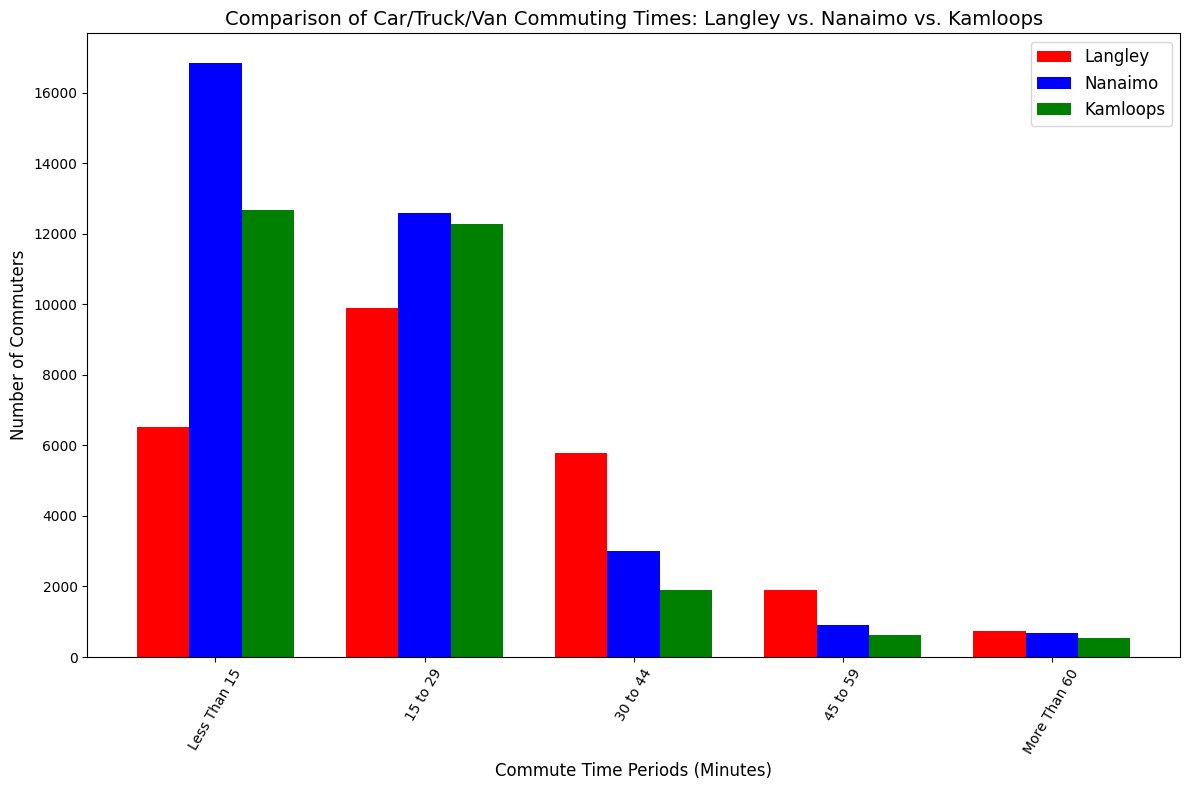

In [132]:
# Setup variables for creating the bar graph
x = np.arange(len(car_truck_van))  # Create x-axis positions
width = 0.25  # Reduce bar width to fit three cities side by side

# Create a bar graph comparing each column between Langley, Nanaimo, and Kamloops
plt.figure(figsize=(12, 8))  # Adjust figure size
plt.bar(x - width, langley_values, width, label='Langley', color='red')
plt.bar(x, nanaimo_values, width, label='Nanaimo', color='blue')
plt.bar(x + width, kamloops_values, width, label='Kamloops', color='green')

# Add labels to the bar graph
plt.xlabel('Commute Time Periods (Minutes)', fontsize=12)
plt.ylabel('Number of Commuters', fontsize=12)
plt.title('Comparison of Car/Truck/Van Commuting Times: Langley vs. Nanaimo vs. Kamloops', fontsize=14)
plt.xticks(x, pretty_car_truck_van, rotation=60, fontsize=10)  # Update x-ticks if necessary
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

We can see from this comparison, that Nanaimo and Kamloops, despite having substationally more commuters travelling via Car/Truck/Van (we will call this "automobile traffic" from now on), have both done a great job at keeping commuting times below 30 minutes for over 85% of their automobile-commuting population, compared to Langley, where about only 50% of the automobile-reliant commuters have travel times below 30 minutes.

Since Nanaimo also had the best average commuting times for Motorcycle/Scooter/Moped traffic we can make the same comparison graph for that mode of transportation.

In [133]:
motorcycle_scooter_moped = []
for column in langley_nanaimo_kamloops.columns:
    if column.startswith('Motorcycle_Scooter_Moped_') and column != 'Motorcycle_Scooter_Moped_Avg_Duration':
        motorcycle_scooter_moped.append(column)
print(motorcycle_scooter_moped)

['Motorcycle_Scooter_Moped_Less_Than_15', 'Motorcycle_Scooter_Moped_15_to_29', 'Motorcycle_Scooter_Moped_30_to_44', 'Motorcycle_Scooter_Moped_45_to_59', 'Motorcycle_Scooter_Moped_More_Than_60']


In [134]:
pretty_motorcycle_scooter_moped = [column.replace("Motorcycle_Scooter_Moped_", "").replace("_"," ") for column in motorcycle_scooter_moped]
print(pretty_motorcycle_scooter_moped)

['Less Than 15', '15 to 29', '30 to 44', '45 to 59', 'More Than 60']


In [137]:
langley_values = langley_data[motorcycle_scooter_moped].to_numpy().flatten()
nanaimo_values = nanaimo_data[motorcycle_scooter_moped].to_numpy().flatten()
kamloops_values = kamloops_data[motorcycle_scooter_moped].to_numpy().flatten()

print(langley_values)
print(nanaimo_values)
print(kamloops_values)

[ 7.5 17.5  5.   0.   0. ]
[60. 45.  0.  0.  0.]
[35. 30.  0. 10.  0.]


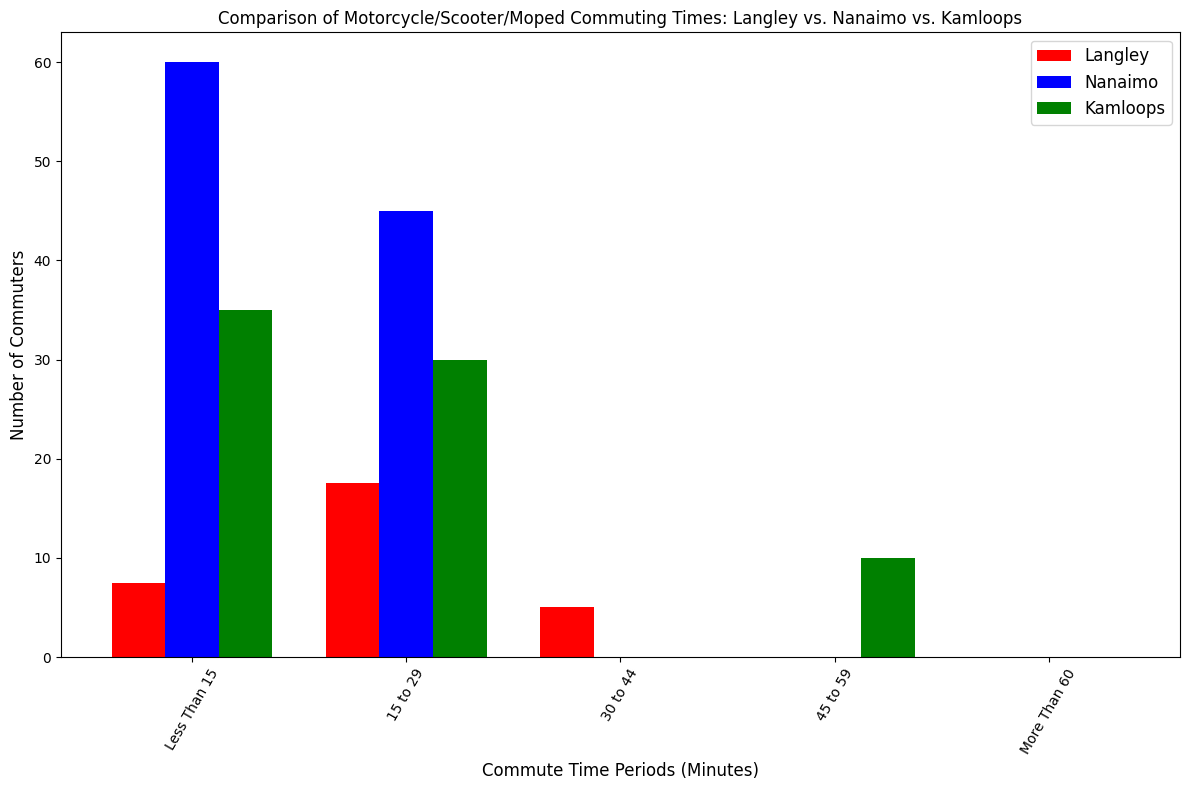

In [138]:
# Setup variables for creating the bar graph
x = np.arange(len(motorcycle_scooter_moped))  # Create x-axis positions
width = 0.25  # Reduce bar width to fit three cities side by side

# Create a bar graph comparing each column between Langley, Nanaimo, and Kamloops
plt.figure(figsize=(12, 8))  # Adjust figure size
plt.bar(x - width, langley_values, width, label='Langley', color='red')
plt.bar(x, nanaimo_values, width, label='Nanaimo', color='blue')
plt.bar(x + width, kamloops_values, width, label='Kamloops', color='green')

# Add labels to the bar graph
plt.xlabel('Commute Time Periods (Minutes)', fontsize=12)
plt.ylabel('Number of Commuters', fontsize=12)
plt.title('Comparison of Motorcycle/Scooter/Moped Commuting Times: Langley vs. Nanaimo vs. Kamloops', fontsize=12)
plt.xticks(x, pretty_motorcycle_scooter_moped, rotation=60, fontsize=10)  # Update x-ticks if necessary
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

From this graph, we can see another example of Nanaimo having much more commuters using this transportation method, however they still manage to keep the travel times below 15 minutes for the majority of commuters. Meanwhile, the smaller number of Langley individuals are still travelling for more time.

Next, we will do some geospatial analysis on Nanaimo and Langley to see how the geography and road infrastructure of the two cities may be affecting commuting times, and what Nanaimo is doing differently than Langley to be so much more efficient.

   OBJECTID  NGD_UID               NAME  TYPE   DIR AFL_VAL ATL_VAL AFR_VAL  \
0         1  5792582             des 60  RANG  None     195     195     182   
1         2  4744971  Township Road 734  None  None    None    None    None   
2         3  1935694           733 Grid    RD  None    None    None    None   
3         4  1618738               None  None  None    None    None    None   
4         5  5055161              Maple    ST  None    None    None    None   

  ATR_VAL        CSDDGUID_L  ... CSDTYPE_R    PRDGUID_L PRUID_L  \
0     194  2021A00052457050  ...        MÉ  2021A000224      24   
1    None  2021A00054819006  ...        MD  2021A000248      48   
2    None  2021A00054706063  ...        RM  2021A000247      47   
3    None  2021A00054704011  ...        RM  2021A000247      47   
4    None  2021A00054706027  ...        CY  2021A000247      47   

          PRNAME_L    PRDGUID_R PRUID_R         PRNAME_R RANK CLASS  \
0  Quebec / Québec  2021A000224      24  Quebec / Q

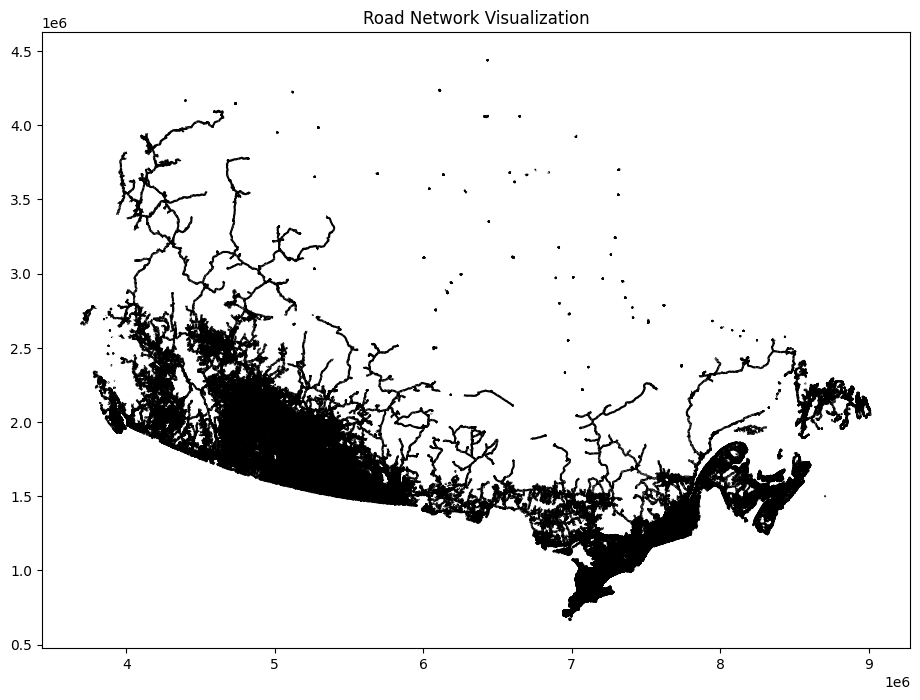

In [92]:
# Path to the .shp file
shapefile_path = "../data/raw/shapefile"

# Load the shapefile
road_data = gpd.read_file(shapefile_path)

# Inspect the data
print(road_data.head())
print(road_data.columns)
print(road_data.crs) # Check the coordinate reference system (CRS)

# Plot the entire road network
road_data.plot(figsize=(12, 8), edgecolor="black")
plt.title("Road Network Visualization")
plt.show()

Next, we will filter to find roads specific to "Langley" or "Nanaimo".

In [105]:
# Filter roads where census subdivision contains 'Langley'
langley_roads = road_data[
    (road_data["CSDNAME_L"].str.contains("Langley", case=False, na=False)) |
    (road_data["CSDNAME_R"].str.contains("Langley", case=False, na=False))
]
print(langley_roads)

         OBJECTID  NGD_UID        NAME  TYPE   DIR AFL_VAL ATL_VAL AFR_VAL  \
69             70  4413934          70   AVE  None    None    None    None   
1480         1481   302002        204b    ST  None    9495    9507    9494   
1588         1589   308049         45a   AVE  None   20465   20501    None   
1646         1647  4413780          68   AVE  None    None    None    None   
1687         1688  4132266          72   AVE  None   19661   19699   19660   
...           ...      ...         ...   ...   ...     ...     ...     ...   
2239884   2239885   308990  Southridge  CRES  None    4500    4500    4560   
2240101   2240102   305937          88   AVE  None   25337   25723   25222   
2240204   2240205   309126         216    ST  None    4401    4449    4400   
2241204   2241205   307236          50   AVE  None   20305   20345    None   
2241425   2241426  4449316        201a    ST  None    None    5279    None   

        ATR_VAL        CSDDGUID_L  ... CSDTYPE_R    PRDGUID_L P

In [106]:
# Filter roads where census subdivision contains 'Nanaimo'
nanaimo_roads = road_data[
    (road_data["CSDNAME_L"].str.contains("Nanaimo", case=False, na=False)) |
    (road_data["CSDNAME_R"].str.contains("Nanaimo", case=False, na=False))
]
print(nanaimo_roads)

         OBJECTID  NGD_UID           NAME TYPE   DIR AFL_VAL ATL_VAL AFR_VAL  \
38             39  2907074         Apollo   DR  None    None    None    None   
67             68  2907091      Sea Otter   PL  None    1910    1934    1909   
266           267  2942046        Gervais   RD  None    1310    1340    1305   
308           309  2906539        Terrien  WAY  None     770    None     769   
362           363  4502466          Biggs   RD  None    None    None    None   
...           ...      ...            ...  ...   ...     ...     ...     ...   
2241040   2241041  4610918           Tait   RD  None    None    None    None   
2241061   2241062  2908045       Seahaven   RD  None    1947    2015    1948   
2241103   2241104  2906933  Northwest Bay   RD  None    2181    2189    2180   
2241379   2241380  4155020     Waterstone  WAY  None    3064    3036    3014   
2241720   2241721  4521199      Battersea   RD  None    None    None    None   

        ATR_VAL        CSDDGUID_L  ... 

In [139]:
# Filter roads where census subdivision contains 'Kamloops'
kamloops_roads = road_data[
    (road_data["CSDNAME_L"].str.contains("Kamloops", case=False, na=False)) |
    (road_data["CSDNAME_R"].str.contains("Kamloops", case=False, na=False))
]
print(kamloops_roads)

         OBJECTID  NGD_UID      NAME  TYPE   DIR AFL_VAL ATL_VAL AFR_VAL  \
1464         1465  3713165     Olive   WAY  None      21      24      40   
1830         1831  4430878   Pacific   WAY  None    None    None    1790   
2159         2160   609299     Moray    ST  None    1034    1056    1045   
2221         2222  3724133    Midway    ST  None    1305    1395    1310   
2289         2290  4430395   Nechako    DR  None    None    None    None   
...           ...      ...       ...   ...   ...     ...     ...     ...   
2239424   2239425    31829       6th   AVE  None    None    None    1308   
2239430   2239431  4745897   Shuswap    RD  None    None    None    None   
2239804   2239805    30155      None  None  None    None    None    None   
2240124   2240125    29700      Bank    RD  None    None    None    3045   
2240164   2240165  4444679  Arab Run    RD  None     120     190    None   

        ATR_VAL        CSDDGUID_L  ... CSDTYPE_R    PRDGUID_L PRUID_L  \
1464         3

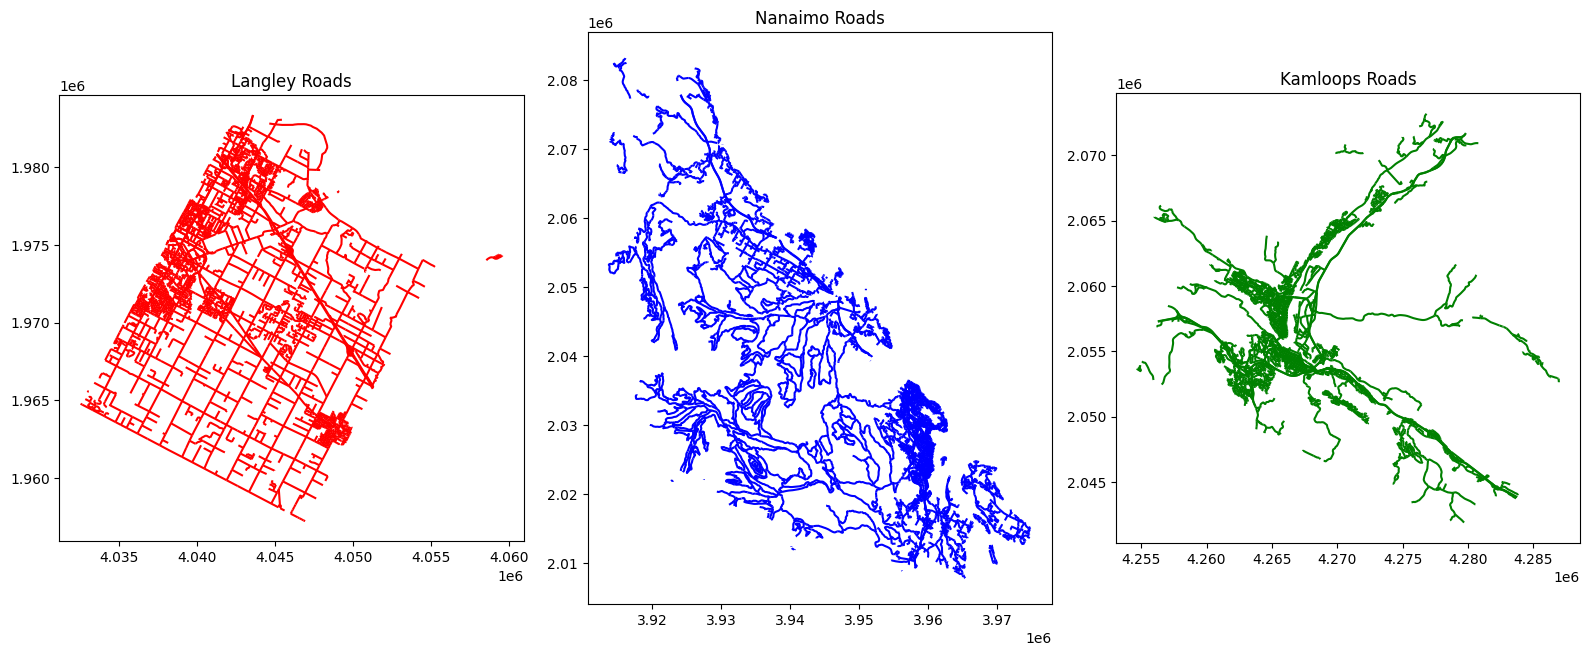

In [141]:
# Plot the filtered data
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
# Langley plot
langley_roads.plot(ax=ax[0], edgecolor="red", legend=True)
ax[0].set_title("Langley Roads")

# Nanaimo plot
nanaimo_roads.plot(ax=ax[1], edgecolor="blue", legend=True)
ax[1].set_title("Nanaimo Roads")

# Kamloops plot
kamloops_roads.plot(ax=ax[2], edgecolor="green", legend=True)
ax[2].set_title("Kamloops Roads")

plt.tight_layout()
plt.show()

Now, let's calculate the road density of the roads in Langley and Nanaimo. This will allow us to see and compare how well-connected the road networks are in each region.

In [144]:
# Add a new column "length_km" for road length
langley_roads["length_km"] = langley_roads.geometry.length / 1000
nanaimo_roads["length_km"] = nanaimo_roads.geometry.length / 1000
kamloops_roads["length_km"] = kamloops_roads.geometry.length / 1000

# Calculate total road length ( / 1000 to convert from metres to kilometres)
total_length_langley = langley_roads["length_km"].sum()
total_length_nanaimo = nanaimo_roads["length_km"].sum()
total_length_kamloops = kamloops_roads["length_km"].sum()

To find the area of both cities, we can just manually find it by querying the data provided by Statistics Canada as shown:

### Langley's area: 11.8km^2

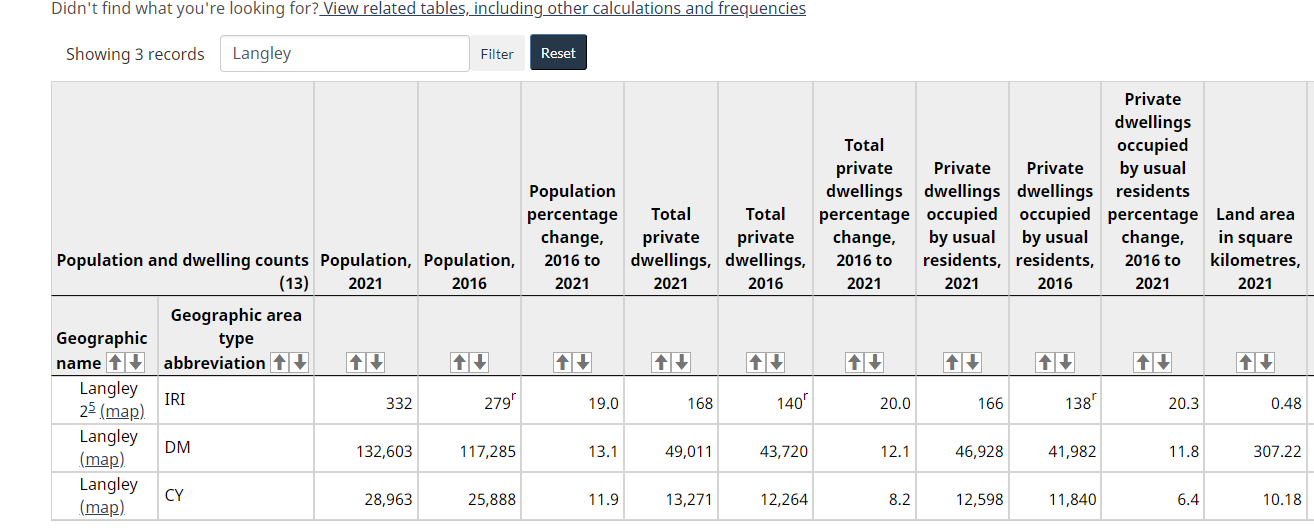

### Nanaimo's area: 90.45km^2

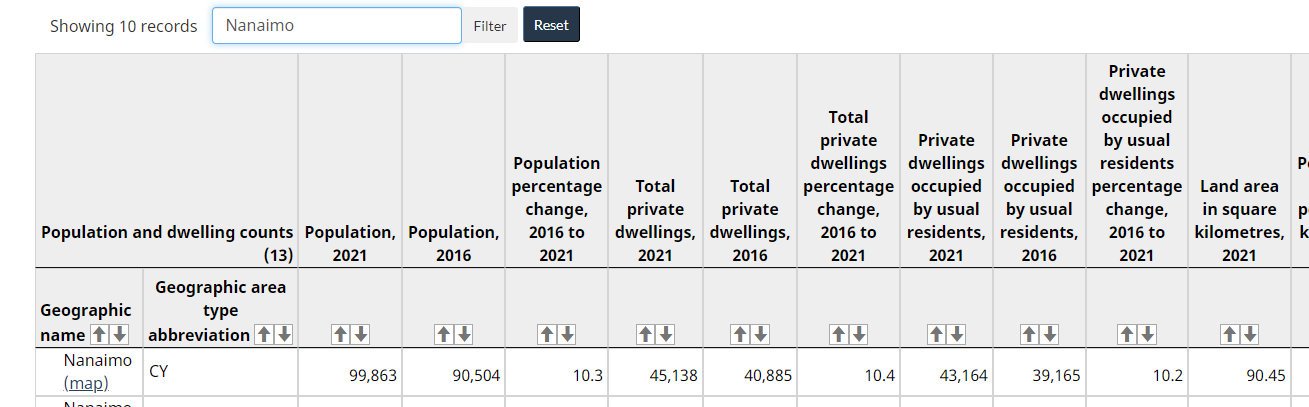

### Kamloops's area: 297.93km^2

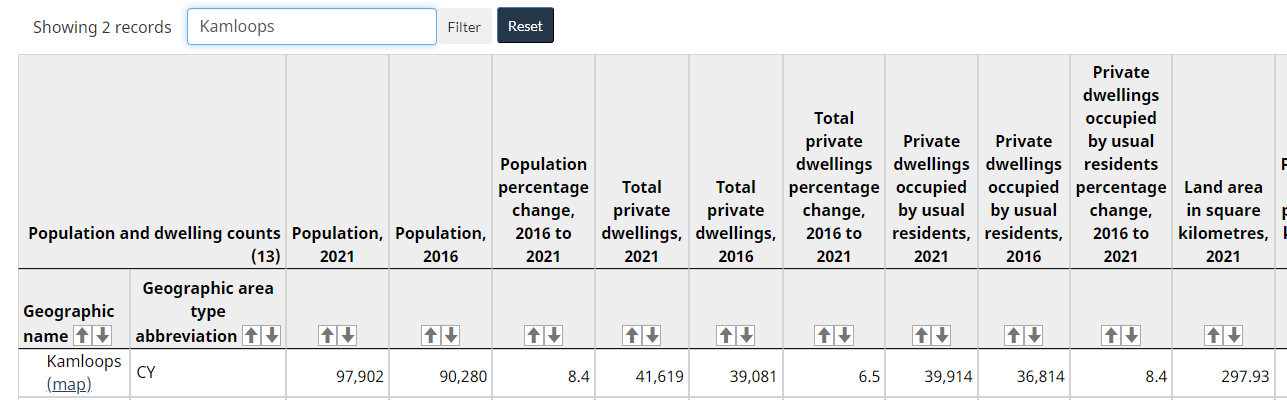

In [145]:
# Declare these areas as variables so we can work with them
langley_area_km2 = 11.80
nanaimo_area_km2 = 90.45
kamloops_area_km2 = 297.93

# Calculate the density (total road length/area)
langley_density = total_length_langley / langley_area_km2
nanaimo_density = total_length_nanaimo / nanaimo_area_km2
kamloops_density = total_length_kamloops / kamloops_area_km2

# Verify these values
print(langley_density)
print(nanaimo_density)
print(kamloops_density)

95.30456946934217
34.071911475170786
3.212998355114931


We can visualize the density comparison with a simple bar chart.

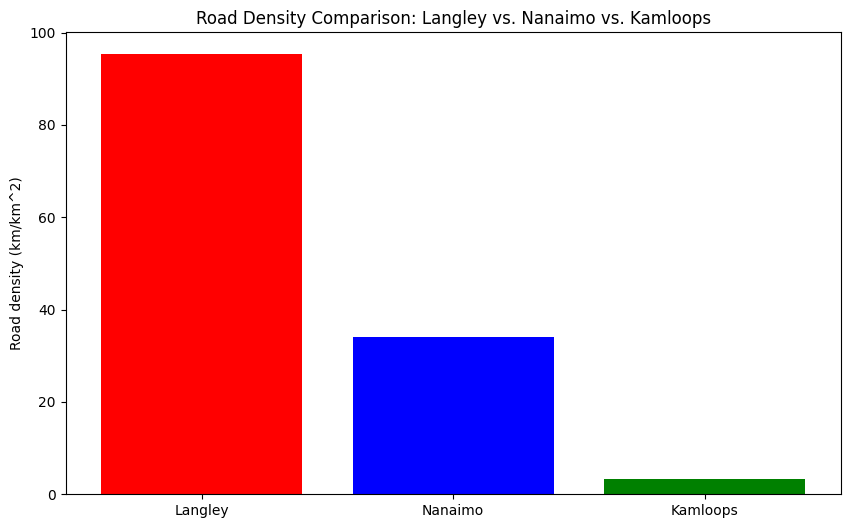

In [146]:
regions = ["Langley", "Nanaimo", "Kamloops"]
densities = [langley_density, nanaimo_density, kamloops_density]
plt.figure(figsize=(10, 6))
plt.bar(regions, densities, color=['red', 'blue', 'green'])
plt.ylabel('Road density (km/km^2)')
plt.title("Road Density Comparison: Langley vs. Nanaimo vs. Kamloops")
plt.show()

We can further break down the road density by partitioning the roads into their different types (highways, local streets, etc.).

In [147]:
# Total road length by type
langley_length_by_type = langley_roads.groupby("TYPE")["length_km"].sum()
nanaimo_length_by_type = nanaimo_roads.groupby("TYPE")["length_km"].sum()
kamloops_length_by_type = kamloops_roads.groupby("TYPE")["length_km"].sum()

print(f"Langley's road length (in kilometres) by road type: {langley_length_by_type}\n")
print(f"Nanaimo's road length (in kilometres) by road type: {nanaimo_length_by_type}\n")
print(f"Kamloops's road length (in kilometres) by road type: {kamloops_length_by_type}\n")

Langley's road length (in kilometres) by road type: TYPE
AVE       472.858747
BYPASS      7.926764
CRES       46.587271
CRT         1.593303
DIVERS      1.283241
DR         11.654420
HWY        63.799499
LANE        0.342401
PL          2.691418
RD         27.216062
ST        453.157061
TRAIL       8.564780
WAY         9.830638
Name: length_km, dtype: float64

Nanaimo's road length (in kilometres) by road type: TYPE
ALLEY       0.183690
AVE        88.045140
BAY         0.341516
BLVD       12.208469
BYPASS      7.923871
CIR         3.329203
CLOSE       3.007056
CRES       57.503384
CRNRS       0.100136
CRT         2.044165
DR        196.325195
END         0.268482
ESTATE      1.344406
FSR         1.036987
GATE        0.186157
HILL        0.775777
HOLLOW      0.056344
HTS         0.431748
HWY       208.739795
ISLAND      0.208505
LANDNG      0.087116
LANE       24.856003
LKOUT       0.984962
LOOP        1.087445
PK          3.695579
PKY        38.257787
PL         76.081203
PLACE       0

From this analysis, we can infer that Langley’s grid-like layout, dominated by local roads such as AVE and ST, limits its capacity to manage regional traffic efficiently. With only ~64 km of highway infrastructure, Langley commuters likely face congestion on local roads during peak hours. 

In contrast, Nanaimo’s ~200 km of highways, along with a diverse mix of arterial roads (PKY, BLVD), facilitates smoother regional travel and helps distribute traffic more evenly. Kamloops is very similar to Nanaimo, with the majority of it's road lenght being composed of drives (DR), roads (RD), and highways (HWY).These differences in road infrastructure likely contribute to Nanaimo and Kamloops’s shorter commuting times compared to Langley, particularly for car and highway-based travel.

### Next Section: Public Transit Based Case Study
Before we make actionable insights that can be applied to Langley, we should take a look at the public transit infrastructure and commuting times between Langley and similar cities with more efficient public transit times.